## Background:

The project relates to civil engineering domain, specifically cement manufacturing.  Concrete is an important construction material.  There have been several studies on improving concrete compressive strength by studying various ingredients of the concrete mix.  In this case, the actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined in a laboratory.  The raw dataset (unscaled) containing eight quantitative input variables (components of a concrete mix in various measures and conditions) and one quantative output variable (concrete compressive strength) is available for study.

The Concrete Compressive Strength (CCS) determines the quality of concrete. This is generally determined by a standard crushing test on a concrete cylinder. This requires engineers to build small concrete cylinders with different combinations of raw materials and test these cylinders for strength variations with a change in raw constituents and additives. The recommended wait time for testing the cylinder is 28 days for good results. This method is time consuming and labour intensive. Human errors are are also possible.

The relations between the concrete constituents and how each constituent affects CCS individually and in combination have been studied on several occasions. Mathematical equations have been formulated to depict these relations but they are not accurate enough all the time in real world experiments. These tests have however generated adequate data for predictive modelling.This dataset is one such example. Hence ML algorithms and their models are now well placed to predict CCS given a combination of raw constituents.  

## Project Objective:

To model the strength of high performance concrete using Machine Learning.

In [300]:
# Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import scipy.stats as stats
import statsmodels 
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [259]:
# Load the data
df = pd.read_csv('concrete.csv')

## Raw Data:

A study of the raw dataset shows that it is organised in several columns. There are 1030 observations (rows).

### Mandatory Constituents in the Concrete Mix (columns):

Cement - Measured in kg in a cubic metre mixture. The values in the dataset range from 102 kg to 540 kg. There are no missing values. Using cement as the datum, there are over 300 combinations of materials that have been evaluated for different ages.

Water - Measured in kg in a cubic metre mixture.The values in the dataset range from 121.8 kg to 247 kg. There are no missing values.

‘Aggregate’ is a term for any particulate material. It includes gravel, crushed stone, sand, recycled concrete and geosynthetic aggregates. Aggregates may be natural, manufactured or recycled. Aggregate is commonly considered inert filler, which accounts for 60 to 80 percent of the volume and 70 to 85 percent of the weight of concrete. Although aggregate is considered inert filler, it is a necessary component that defines the concrete’s thermal and elastic properties and dimensional stability.The different properties of aggregate have a large impact on the strength, durability, workability, and economy of concrete. 

Aggregate is classified as two different types, coarse and fine. Coarse aggregate is usually greater than 4.75 mm (retained on a No. 4 sieve), while fine aggregate is less than 4.75 mm (passing the No. 4 sieve).

Coarse Aggregate - Measured in kg in a cubic metre mixture.The values in the dataset range from 801 kg to 1145 kg. There are no missing values.

Fine Aggregate - Measured in kg in a cubic metre mixture.The values in the dataset range from 594 kg to 992.6 kg. There are no missing values.

### Optional Constituents in the Concrete Mix (columns):

It is obvious that in the experiments carried out to study Concrete Compressive Strength (CCS) that some materials were added in certain mixtures to determine or study their effect on CCS either independently or together. They are as follows:-

Slag - Slag also called blast or GGBS(Ground Granulated Blast-furnace Slag) is a cementitious material whose main use is in concrete and is a by-product from the blast-furnaces used to make iron. Measured in kg in a cubic metre mixture in this dataset. The values in the dataset range from 11 kg to 359.4 kg, excluding several mixtures where no slag or blast was added. Hence, there are 471 observations where no slag (0) was added to the mix. There are no missing values.

Ash - Ash or Fly Ash is a fine powder that is a byproduct of burning pulverized coal in electric generation power plants. Fly ash is a pozzolan, a substance containing aluminous and siliceous material that forms cement in the presence of water. When mixed with lime and water, fly ash forms a compound similar to cement. When used in concrete mixes, fly ash improves the strength and segregation of the concrete and makes it easier to pump. Measured in kg in a cubic metre mixture in this dataset. The values in the dataset range from 24.5 kg to 200.1 kg, excluding several mixtures where no fly ash was added. Hence, there are 566 observations where no fly ash (0) was added to the mix. There are no missing values.

Superplasticizer (SP) - Plasticizers and superplasticizers are water reducing admixtures (ingredients that are added to the concrete batch immediately before or during mixing). They are a combination of organic and inorganic polymers that impart a plasticizing effect to the concrete mixture making it flowing, pourable and improve workability in addition to enhancing strength, albeit indirectly. Measured in kg in a cubic metre mixture in this dataset. The values in the dataset range from 1.7 kg to 32.2 kg, excluding several mixtures where no SP was added. Hence, there are 379 observations where no SP (0) was added to the mix. There are no missing values.

There are 209 observations where no slag, ash or SP have been added to the concrete mixture. 

Even though all the input variables have the same units, i.e. kg per cubic metre, the range of values indicates that the dataset will benefit from scaling for better comparison.

Age - The age of concrete mix in the dataset is between 1 day and 365 days.  There are no missing values.  Not all values are included. Specific days such as one day old, three days old, one week old, two weeks old, 28 days old (accepted to be the standard setting time for concrete), three months, four months, six months, nine months and one year have been considered.  The selection is logical. 

Strength - The output variable Concrete Compressive Strength has values ranging between 2.33 Mpa to 82.6 MPa. There are no missing values.





## Data Assumptions

### Disclaimer : I am not a civil engineer or construction specialist.  My derivations are based on the reading that I did to gain more insights into the nature of concrete so that I have a better understanding of concrete strength.

Cement: Cement is of several types. The storage conditions of cement (should be dry) play a role in concrete strength. In the absence of data, it is assumed that the same cement type was used in all the experiments and that the cement was stored in the same conditions (kept dry).

Water: Frequently the quality of the water used in construction is covered by a clause stating “..the water should be fit for drinking..”. This criterion though is not absolute and reference should be made to respective codes for testing of water construction purpose. It is assumed that the water used meets construction criteria. 

Aggregates: Quality of aggregates, its size, shape, texture, strength etc determines the strength of concrete. The presence of salts (chlorides and sulphates), silt and clay also reduces the strength of concrete. In the absence of data regarding the type of aggregates used, it has to be assumed that the same aggregates were used evenly for all the tests that resulted in this dataset.

Temperature and Hydration: The degree of hydration is synonymous with the age of concrete provided the concrete has not been allowed to dry out or the temperature is too low. It has to be assumed that the concrete samples in all cases were hydrated optimally and in a controlled manner. It is a manual process. The rate of hydration reaction is temperature dependent. If the temperature increases the reaction also increases. This means that the concrete kept at higher temperature will gain strength more quickly than a similar concrete kept at a lower temperature. However, the final strength of the concrete kept at the higher temperature will be lower. This is because the physical form of the hardened cement paste is less well structured and more porous when hydration proceeds at faster rate.  In the absence of temperature data, it is assumed that even temperatures were maintained during the testing process.

Relative Humidity - If the concrete is allowed to dry out, the hydration reaction will stop. The hydration reaction cannot proceed without moisture. It is hence assumed that all testing was done under the same controlled environmental conditions with same temperature and RH.

Superplasticizer: SPs are of different types with different reactions, depending on their chemistry.  It is assumed that the same SP was used in all samples and used under controlled conditions to keep samples fit for analysis.

Fly Ash - It is assumed that the same type of fly ash was used in testing all samples.

Compaction and Porosity - Any entrapped air resulting from inadequate compaction of the concrete will lead to a reduction in strength. If there was 10% trapped air in the concrete, the strength will fall down in the range of 30 to 40%.  It is assumed that all concrete samples were uniformly compacted and are uniformly porous.

### These assumptions may impact model accuracy if implemented in production simulations.  Data of testing conditions will need to be mentioned and adhered to as standard practice in model based testing of new samples.




In [5]:
df.sample(10) # The column names are relatable to the concrete mixture constituents. 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
27,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
588,157.0,214.0,152.0,200.0,9.0,819.0,704.0,28,33.05
307,491.0,26.0,123.0,210.0,3.9,882.0,699.0,28,55.55
706,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,14,26.05
501,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,31.65
262,266.0,114.0,0.0,228.0,0.0,932.0,670.0,270,51.73
541,145.0,116.0,119.0,184.0,5.7,833.0,880.0,28,29.16
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
10,151.8,178.1,138.7,167.5,18.3,944.0,694.6,28,36.35
253,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,56,31.35


## Data Pre-processing

In [6]:
df.info() # No missing values. All quantitative. 1030 rows, 8 input, 1 output columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [32]:
df.shape

(1030, 9)

In [33]:
sum(df.duplicated()) 

25

In [7]:
df.loc[df.duplicated(), :]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


The presence of these duplicate entries was analyzed.  The original researchers have created this data in lab conditions. It is possible that on some samples, tests were repeated under slightly different conditions on the same day or by different individuals and the data was recorded. It could be that there are marginal round off errors. As further clarity cannot be achieved, either way, cleaning up the dataset does no harm and it is a valid principle of ML.

In [260]:
df.drop_duplicates(inplace=True)

In [261]:
df.shape

(1005, 9)

In [36]:
sum(df.duplicated()) 

0

In [11]:
df.isnull().sum() # Crosscheck for missing variables.

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [13]:
skew = df.skew()
kurt = df.kurt()
pd.concat([skew.rename('skewness'), kurt.rename('kurtosis')],axis=1)

,skewness,kurtosis
cement,0.564959,-0.432458
slag,0.855225,-0.407179
ash,0.497231,-1.366694
water,0.034433,0.167329
superplastic,0.980604,1.695396
coarseagg,-0.065256,-0.583049
fineagg,-0.252353,-0.105881
age,3.253974,11.961963
strength,0.395696,-0.305309


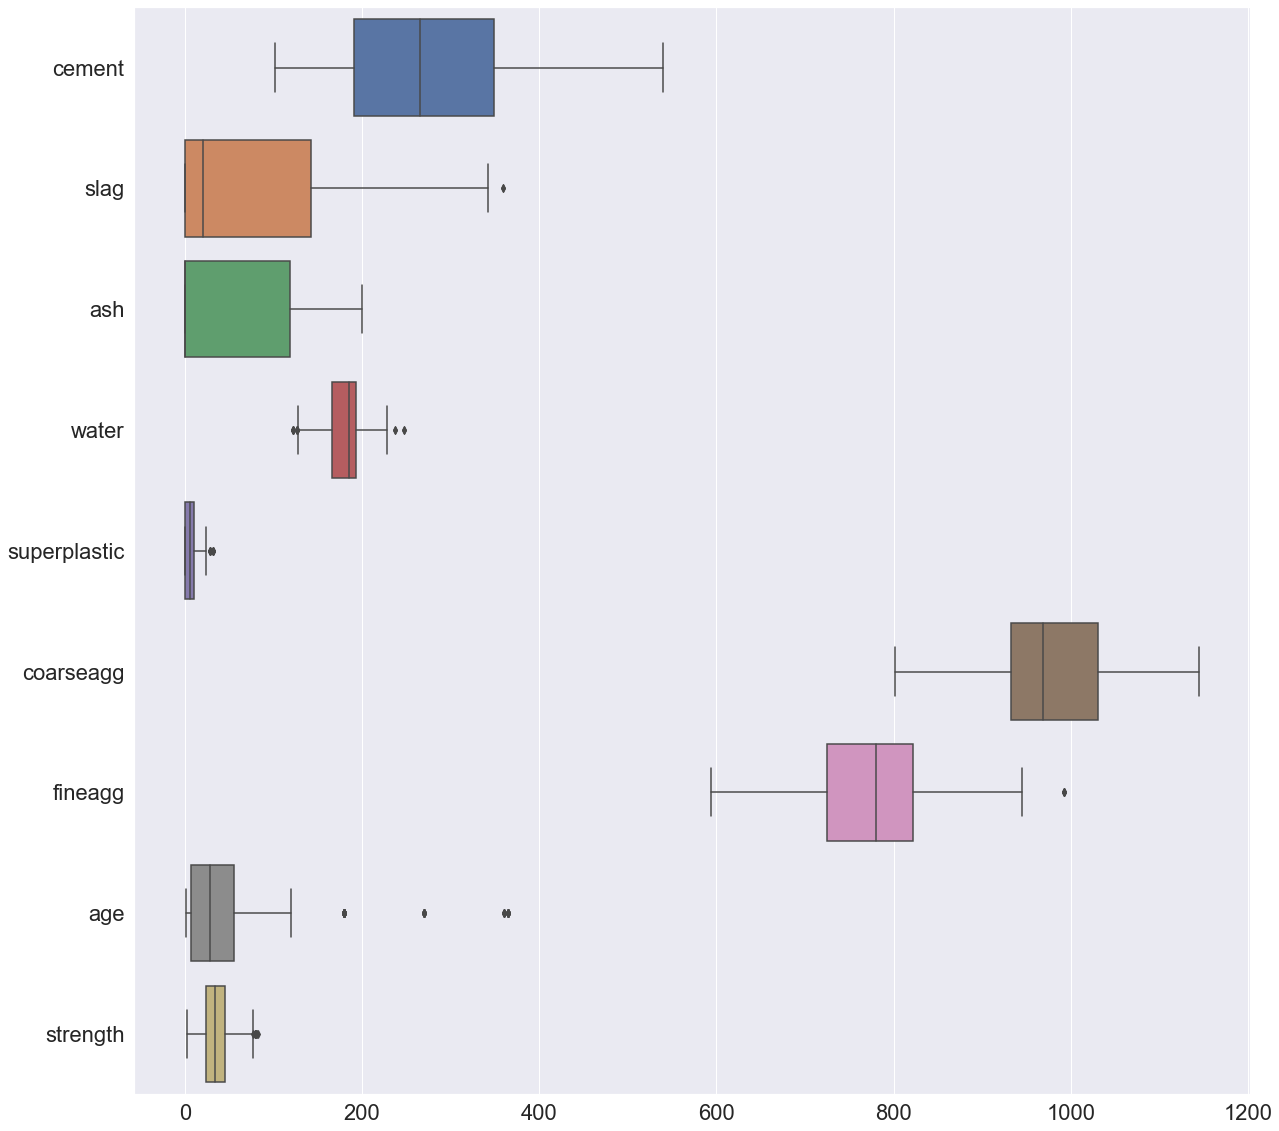

In [14]:
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
sns.set(palette='coolwarm')
sns.set(font_scale=2)
plt.figure(figsize=(20,20))
sns.boxplot(data = df,orient="h")
plt.show()

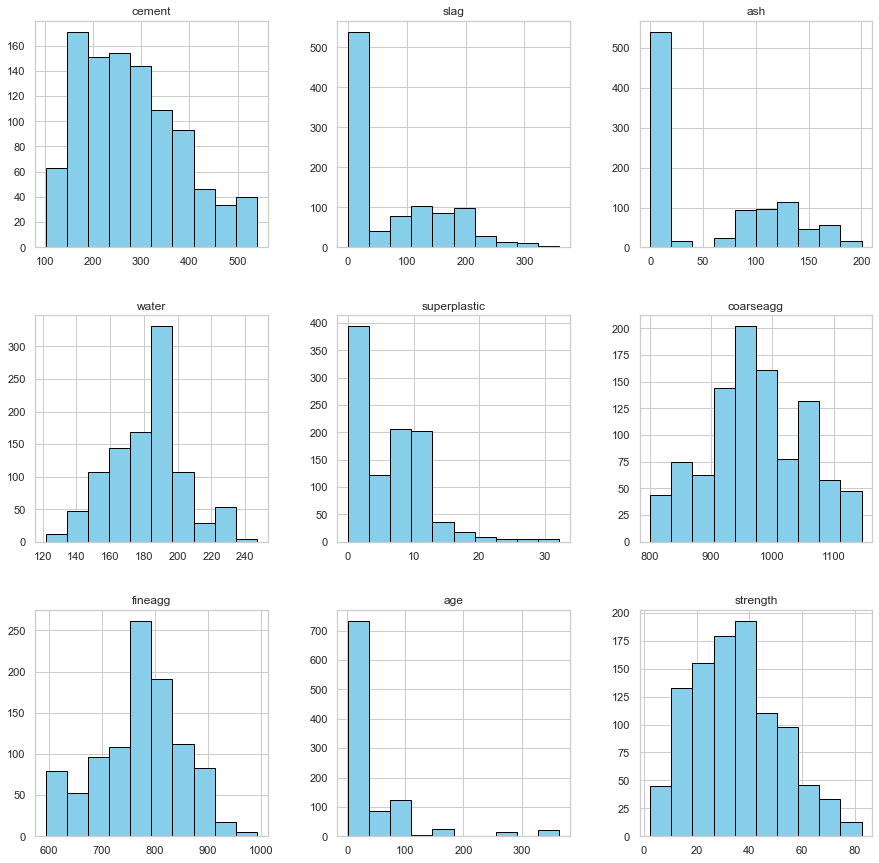

In [15]:
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
df.hist(figsize=(15,15),color = "skyblue",edgecolor='black');

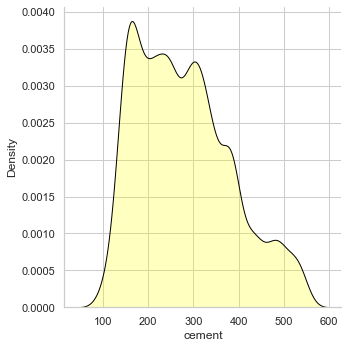

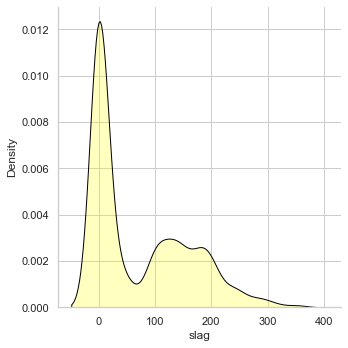

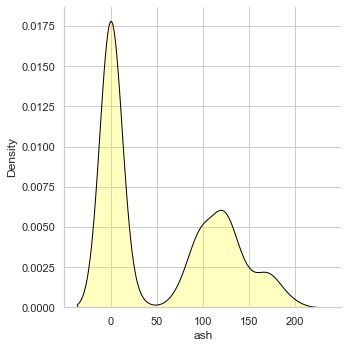

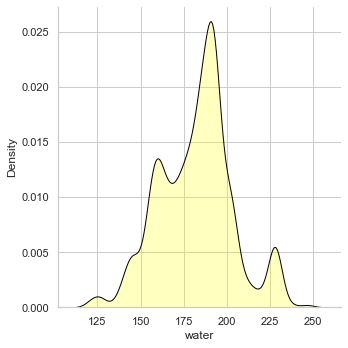

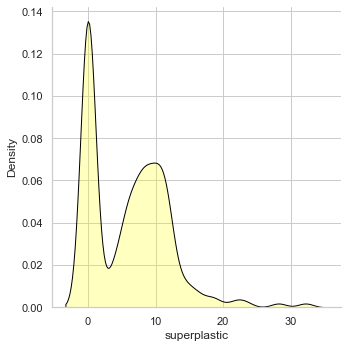

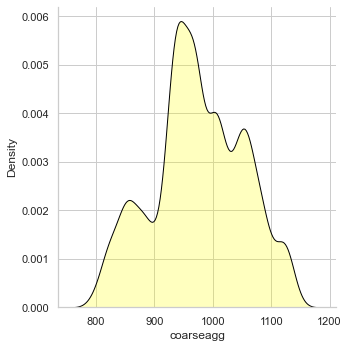

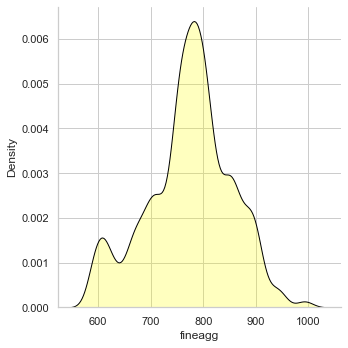

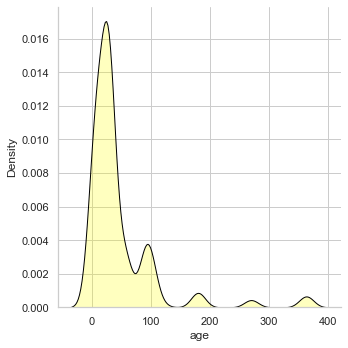

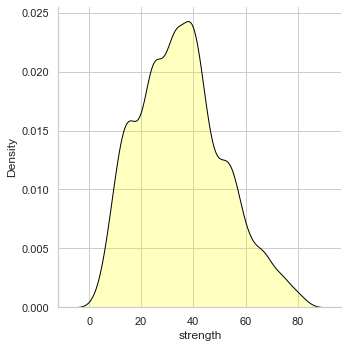

In [16]:
sns.displot(df["cement"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["slag"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["ash"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["water"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["superplastic"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["coarseagg"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["fineagg"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["age"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');
sns.displot(df["strength"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');

#### It is clear that data for cement, slag, ash and superplastic are moderately skewed right.  The skew in 'age' is to be expected given the discrete values in the distribution.  Some form of a normal distribution can be made out in distribution of cement, water, fine and coarse aggregates and strength.  This can be correlated with the mean and median values.  The distributions are however multi modal in most features.

#### The presence of outliers beyond the upper quartile is noticeable in a few variables, slag, water, age and superplastic. The presence of outliers below lower quartile is evident in 'water' variable.  The handling of outliers is deferred to the point when multivariate analysis is completed.

#### The presence of Gaussian Mixture can be made out and is to be expected given the nature of the samples.

Cement has four to five Gaussians   
Slag as atleast three Gaussians    
Ash has two or three Gaussians     
Water has three Gaussians     
Superplastic has atleast two Gaussians       
Coarse Aggregate has atleast three Gaussians        
Fine Aggregate has atleast two Gaussians      
Age has multiple Gaussians      

## EDA

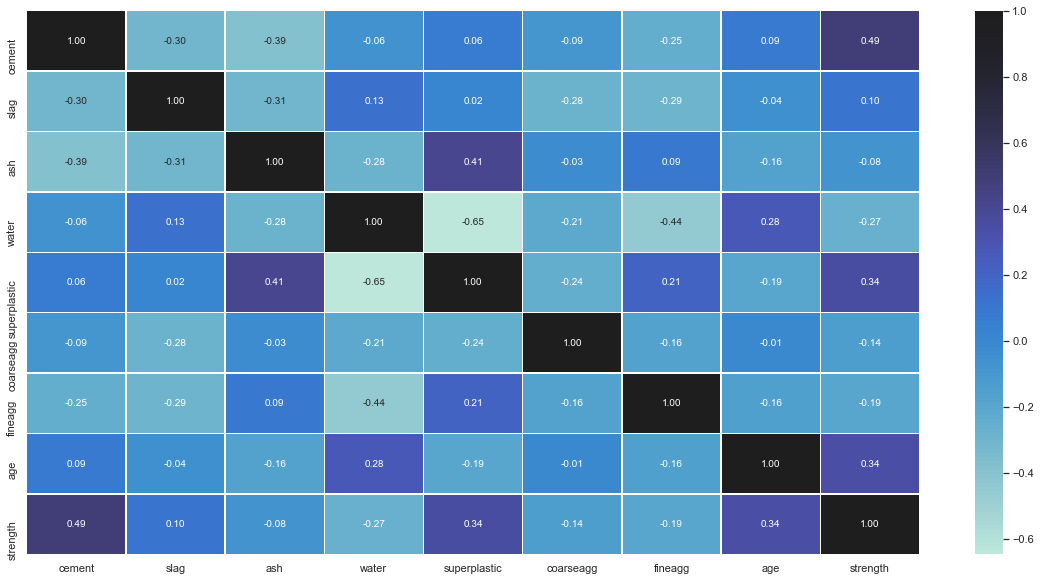

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f', center = 1 )  
plt.show()

In [44]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [43]:
# Highlighting correlation between 'strength' and other columns
correlation_strength=df.corr()['strength']
correlation_strength.sort_values(ascending=False)

strength        1.000000
cement          0.488283
superplastic    0.344209
age             0.337367
slag            0.103374
ash            -0.080648
coarseagg      -0.144717
fineagg        -0.186448
water          -0.269624
Name: strength, dtype: float64

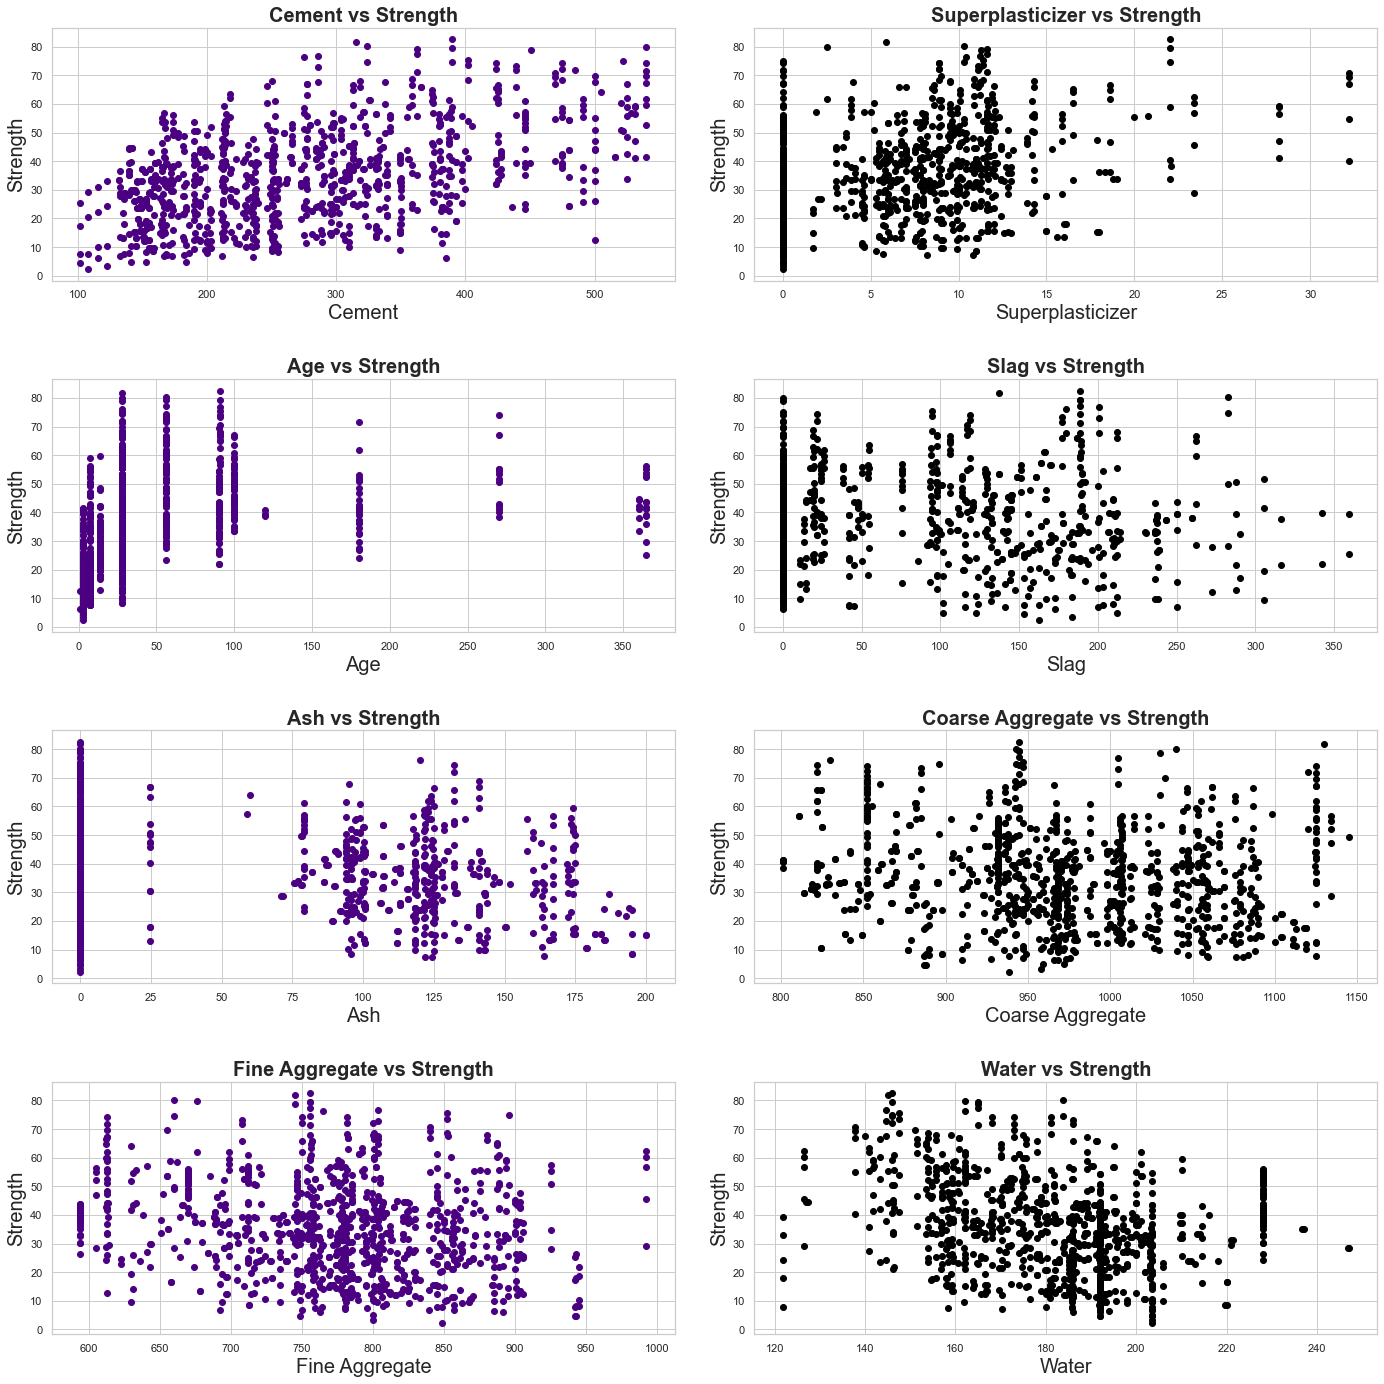

In [70]:
# The correlation plots for each feature against strength is being visually depicted for better understanding.
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)

ax1.scatter (df.cement, df.strength, color='indigo')
ax2.scatter (df.superplastic, df.strength, color='black')
ax3.scatter (df.age, df.strength, color='indigo')
ax4.scatter (df.slag, df.strength, color='black')
ax5.scatter (df.ash, df.strength, color='indigo')
ax6.scatter (df.coarseagg, df.strength, color='black')
ax7.scatter (df.fineagg, df.strength, color='indigo')
ax8.scatter (df.water, df.strength, color='black')

ax1.set_title('Cement vs Strength',fontweight="bold", size=20) 
ax1.set_ylabel('Strength', fontsize = 20.0) 
ax1.set_xlabel('Cement', fontsize = 20)

ax2.set_title('Superplasticizer vs Strength',fontweight="bold", size=20) 
ax2.set_ylabel('Strength', fontsize = 20.0) 
ax2.set_xlabel('Superplasticizer', fontsize = 20)

ax3.set_title('Age vs Strength',fontweight="bold", size=20) 
ax3.set_ylabel('Strength', fontsize = 20.0) 
ax3.set_xlabel('Age', fontsize = 20)

ax4.set_title('Slag vs Strength',fontweight="bold", size=20) 
ax4.set_ylabel('Strength', fontsize = 20.0) 
ax4.set_xlabel('Slag', fontsize = 20)

ax5.set_title('Ash vs Strength',fontweight="bold", size=20) 
ax5.set_ylabel('Strength', fontsize = 20.0) 
ax5.set_xlabel('Ash', fontsize = 20)

ax6.set_title('Coarse Aggregate vs Strength',fontweight="bold", size=20) 
ax6.set_ylabel('Strength', fontsize = 20.0) 
ax6.set_xlabel('Coarse Aggregate', fontsize = 20)

ax7.set_title('Fine Aggregate vs Strength',fontweight="bold", size=20) 
ax7.set_ylabel('Strength', fontsize = 20.0) 
ax7.set_xlabel('Fine Aggregate', fontsize = 20)

ax8.set_title('Water vs Strength',fontweight="bold", size=20) 
ax8.set_ylabel('Strength', fontsize = 20.0) 
ax8.set_xlabel('Water', fontsize = 20)

fig.tight_layout(pad=3.5)


It is very difficult to draw conclusions from univariate analysis of the features.

However, in general cement is positively correlated with concrete strength.  As more cement is added, strength in general rises. This is a logical conclusion; yet typically, cement, age and water are linked together in all the material that I have studied.  Hence, this conclusion needs deliberation.  

There is a negative correlation between water and strength. If the water content increases, it appears as though the strength is reducing, as a general observation. In isolation, this too is logical as when there is too much water in the concrete, there is greater shrinkage with the possibility for more cracks and reduced compressive strength.

It is also believed that concrete strength increases with age.  However, this dataset indicates that concrete strength rises to a maximum value within 28 days, as believed.  Thereafter, it may increase but perhaps not by much and not at the same rate as the initial rise.

In general, as more superplasticizer is added to the mix, strength increases rapidly up to a point and thereafter plateaus. This aspect also needs correlation with multivariate analysis.

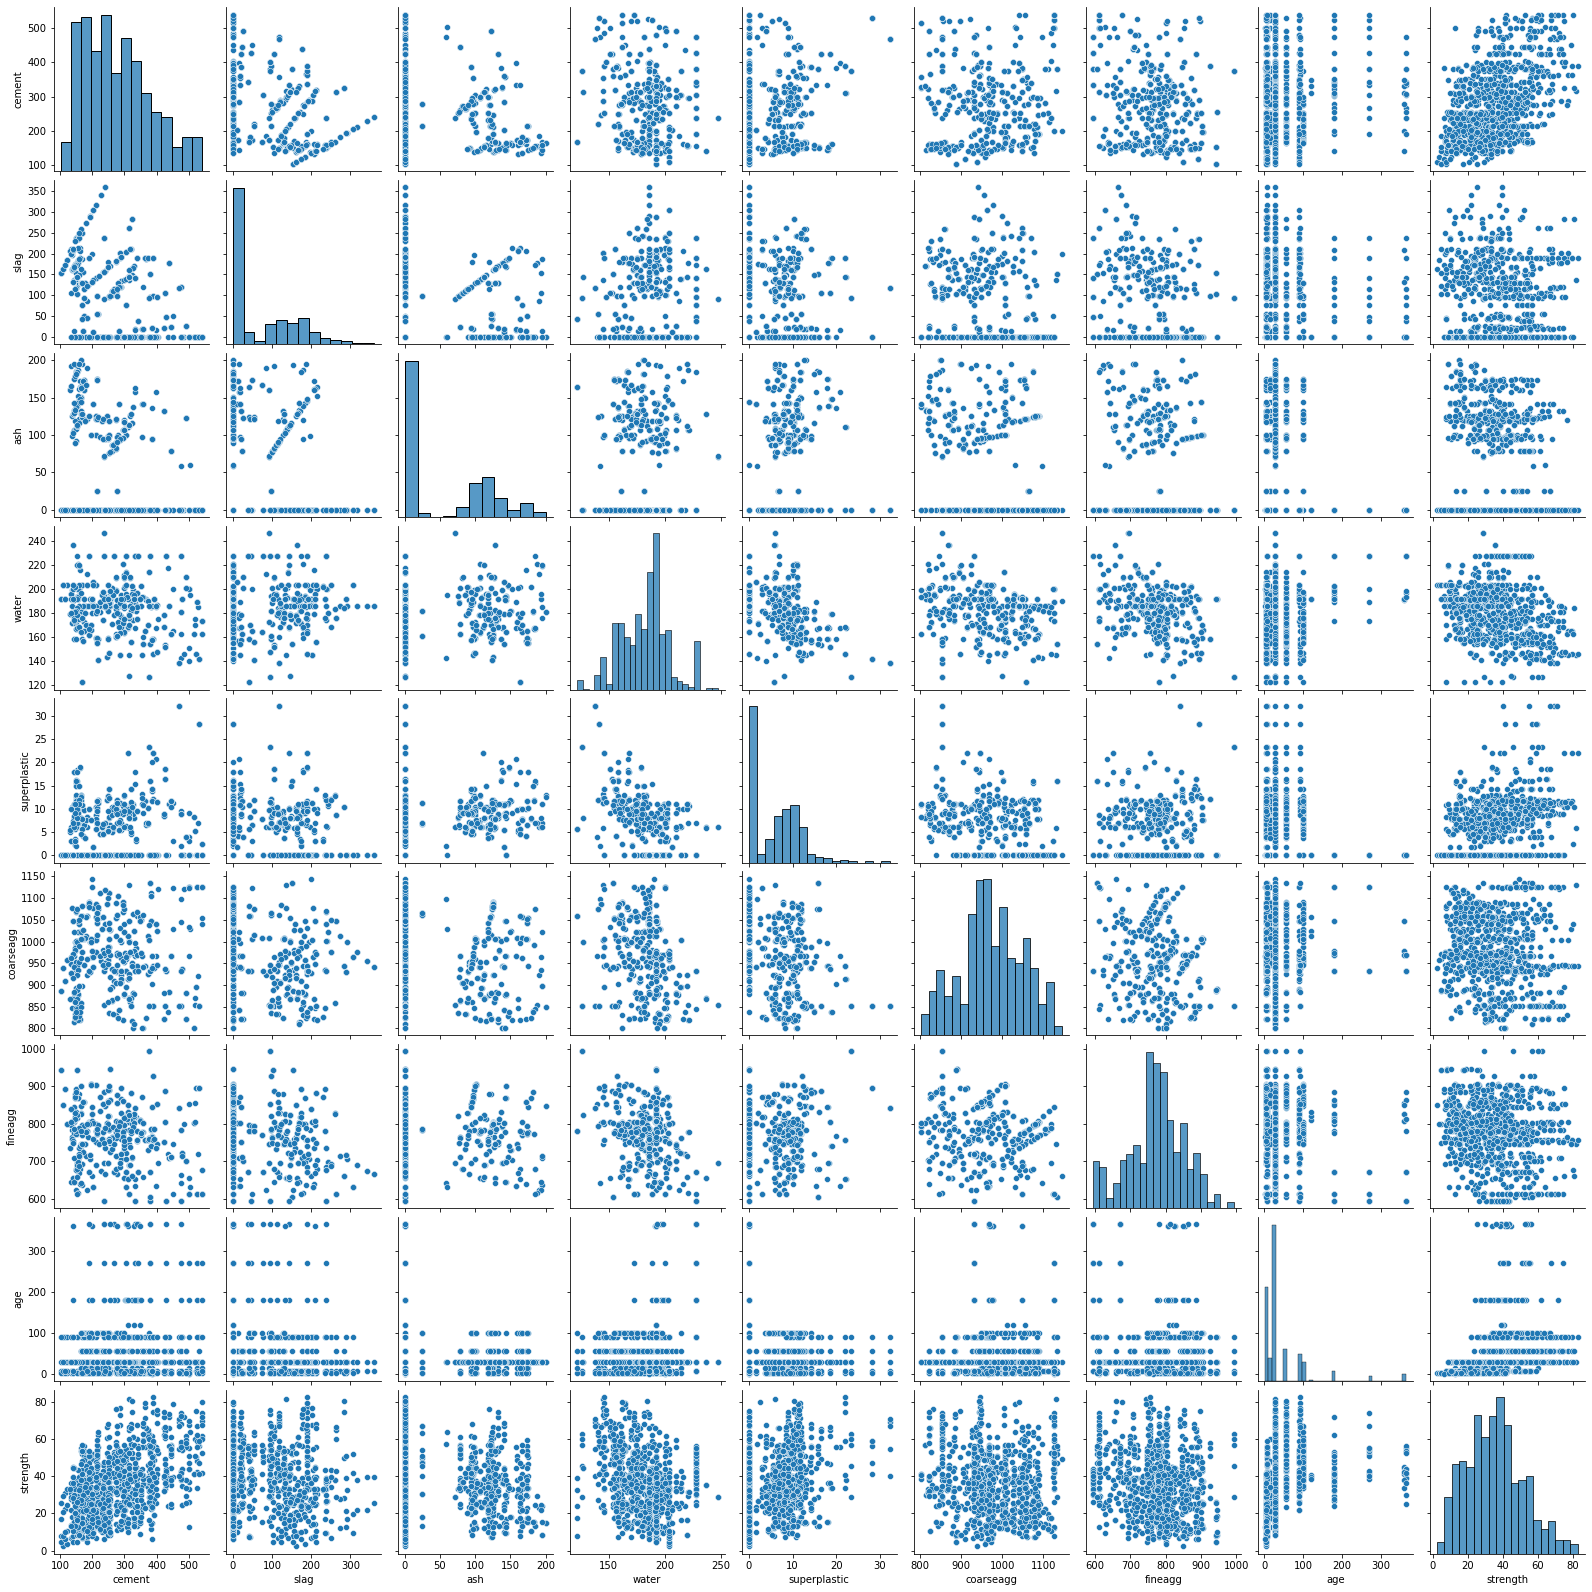

In [10]:
sns.pairplot(df);

One more relation that emerges visibly from this plot is the negative correlation between water and superplasticizer.  This is logical and expected because by nature, superplasticizers are water reducers.

The rest of the variables appear to lack any significant correlation.

#### Understanding Leverage Points

A single observation that is substantially different from all other observations can make a large difference in the results of your regression analysis. If a single observation (or small group of observations) substantially changes your results, you would want to know about this and investigate further. There are three ways that an observation can be unusual.

Outliers: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients. Unlike outliers, which have an unusually large y value, leverage points have extreme x values.

Influence: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.



In [5]:
import statsmodels.formula.api as smf
#instantiation
reg = smf.ols('strength ~ cement + water + age + slag + ash + superplastic + fineagg + coarseagg', data = df)
#launching the modelling process
res = reg.fit()
#detailed results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     189.8
Date:                Fri, 20 Nov 2020   Prob (F-statistic):          2.40e-194
Time:                        16:16:42   Log-Likelihood:                -3764.4
No. Observations:                1005   AIC:                             7547.
Df Residuals:                     996   BIC:                             7591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9198     26.416     -0.678   

60% of the variation in strength is explained by the variables.  The regression is meaningful. The variables are relevant to the model. Evidence of a linear relationship between features can be seen. Errors are not normally distributed.  The variance of errors is reasonably constant.  It can be interpreted that a non-linear model would perform better than the Ordinary Least Squares model.

In [27]:
#object for the analysis of influential points
infl = res.get_influence()
#leverage
print(infl.hat_matrix_diag)
#internally studentized residuals
print(infl.resid_studentized_internal)

[0.00586919 0.00532062 0.00506822 ... 0.00382742 0.01645692 0.01563177]
[ 0.88134311 -0.51626385  0.26019191 ...  0.43494173  0.65017067
  0.38190998]


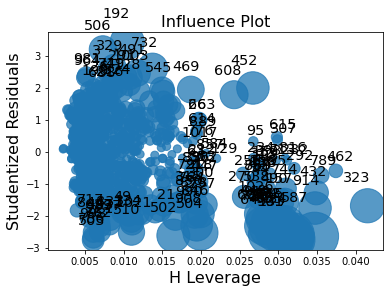

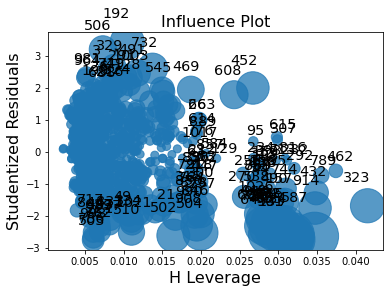

In [6]:
import statsmodels.api as sm
#graphical representation of the influences()
sm.graphics.influence_plot(res)

There are values with both high residual and high leverage values. Outliers are present. 

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(df.columns[:-1])):
    v=vif(np.matrix(df[:-1]),i)
    print("Variance Inflation Factor for {} : {}".format(df.columns[i],round(v,2)))

Variance Inflation Factor for cement : 25.74
Variance Inflation Factor for slag : 4.31
Variance Inflation Factor for ash : 4.6
Variance Inflation Factor for water : 91.46
Variance Inflation Factor for superplastic : 5.23
Variance Inflation Factor for coarseagg : 85.79
Variance Inflation Factor for fineagg : 73.36
Variance Inflation Factor for age : 2.43


There are some features with VIF>10, indicating significant multi collinearity.

In [63]:
statsmodels.stats.outliers_influence.OLSInfluence(res).summary_frame()

,dfb_Intercept,dfb_cement,dfb_water,dfb_age,dfb_slag,dfb_ash,dfb_superplastic,dfb_fineagg,dfb_coarseagg,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.001376,-0.014332,0.003969,-0.012629,0.008175,-0.010880,-0.006082,-0.001712,0.000009,0.000510,0.881343,0.005869,0.067719,0.881244,0.067712
1,0.002346,0.006622,0.000785,0.002724,0.002027,-0.000459,-0.010687,0.001047,-0.010256,0.000158,-0.516264,0.005321,-0.037758,-0.516074,-0.037744
2,-0.011596,0.009386,0.011713,-0.001790,0.007508,0.010372,0.002181,0.013125,0.008831,0.000038,0.260192,0.005068,0.018571,0.260070,0.018562
3,0.049434,-0.078859,0.028540,-0.084294,-0.077288,-0.091202,0.042963,-0.080352,-0.057343,0.005790,2.529403,0.008079,0.228274,2.536292,0.228896
4,-0.005733,0.027445,-0.005733,0.010374,0.014306,0.030952,-0.038659,0.017634,-0.003957,0.000431,-0.555133,0.012429,-0.062277,-0.554940,-0.062256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,-0.024878,0.035952,0.014184,0.005342,0.033939,0.016712,-0.009288,0.025468,0.024170,0.000400,-0.705990,0.007169,-0.059992,-0.705812,-0.059977
1026,0.009435,-0.003893,-0.036009,0.032709,0.051731,0.092613,-0.218282,-0.011837,0.012189,0.011803,-1.931038,0.027699,-0.325927,-1.933691,-0.326374
1027,0.011252,-0.004448,-0.009790,-0.002056,-0.003375,-0.000583,-0.007496,-0.007891,-0.015266,0.000081,0.434942,0.003827,0.026960,0.434765,0.026949
1028,0.015113,-0.017545,-0.001660,0.058452,-0.022807,-0.019872,0.008290,-0.020132,-0.017792,0.000786,0.650171,0.016457,0.084102,0.649982,0.084077


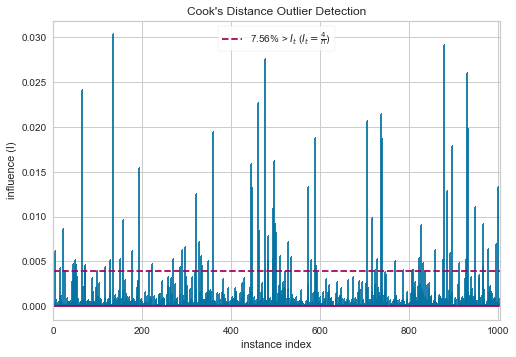

In [67]:
from yellowbrick.regressor import CooksDistance
X=df.iloc[:,0:8].values
y = df.iloc[:,8].values
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show();

The presence of so many highly influential points suggests that linear regression may not be suitable for this dataset. 

## Multivariate Analysis

### Cement, Water, Age and Strength

One of the most common ratios that is encountered in concrete research is the water - cement ratio. Lower the water-cement ratio, keeping other variables constant, higher the concrete strength.  Hence, a new variable called water - cement ratio (wc ratio) is being created. w - water; c - cement.

In [262]:
df['wcratio'] = df.water/df.cement

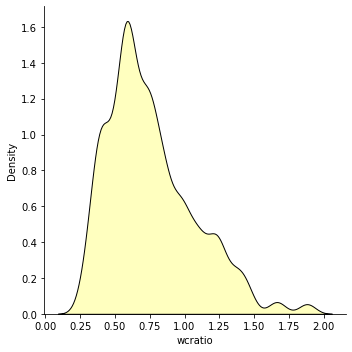

In [14]:
sns.displot(df["wcratio"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');

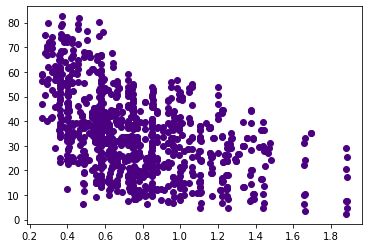

In [14]:
plt.scatter (df.wcratio, df.strength, color='indigo');

The plot confirms that as the water-cement ratio increases, concrete strength reduces. This is logical as increasing water - cement ratio implies lesser cement and / or more water. Higher the water-cement ratio means the higher quantity of water which results in dilution in cement paste. It makes poor concrete mix and increases water permeability. Thus, leads to leakage and dampness. It makes concrete weaker and more susceptible to cracking and shrinkage. Shrinkage produces micro cracks, and it is a zone of weakness.

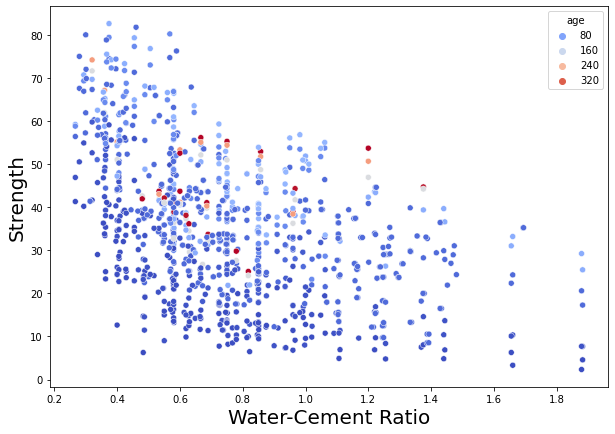

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="wcratio", hue="age", data=df, ax=ax, palette='coolwarm')
ax.set_ylabel('Strength', fontsize = 20.0) 
ax.set_xlabel('Water-Cement Ratio', fontsize = 20)
plt.show()

For a given water-cement ratio, as the age of concrete increases, its strength increases. This is true as a general observation, but not absolutely. Other factors such as aggregates and binders are influencers in each case as well.

In [11]:
# Highlighting correlation between 'strength' and other columns
correlation_strength=df.corr()['strength']
correlation_strength.sort_values(ascending=False)

strength        1.000000
cement          0.488283
superplastic    0.344209
age             0.337367
slag            0.103374
ash            -0.080648
coarseagg      -0.144717
fineagg        -0.186448
water          -0.269624
wcratio        -0.489401
Name: strength, dtype: float64

Considering the positive correlation between cement and strength, negative correlation between water and strength and the strong negative correlation between water-cement ratio and strength, there is a case to retain water-cement ratio and drop water and cement as variables.

### Aggregates

Both coarse aggregate and fine aggregate by themselves are not significantly correlated with strength in this dataset. There is a slight negative correlation between coarse and fine aggregates that could be taken as being insignificant or interpreted that as one type of aggregate increases in the mix, the other is reduced marginally to keep the surface area the same for testing. Indeed, eyeballing the data verifies that the researchers have varied the total aggregate between the ranges 1500 kg per cubic meter to 1900 kg per cubic metre in the dataset, centered around 1800 kg per cubic metre in several cases. There is a case to club both aggregates together to see if it makes any difference to the strength.

In [25]:
df['agg'] = df.coarseagg + df.fineagg  # Agg = Coarse and Fine Aggregates

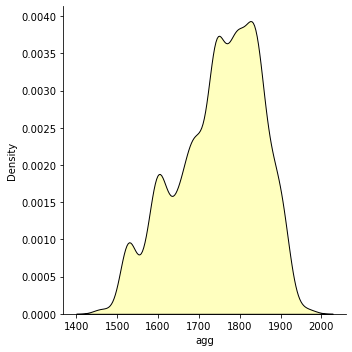

In [7]:
sns.displot(df["agg"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');

In [16]:
# Highlighting correlation between 'strength' and other columns
correlation_strength=df.corr()['strength']
correlation_strength.sort_values(ascending=False)

strength        1.000000
cement          0.488283
superplastic    0.344209
age             0.337367
slag            0.103374
ash            -0.080648
coarseagg      -0.144717
fineagg        -0.186448
agg            -0.256342
water          -0.269624
wcratio        -0.489401
Name: strength, dtype: float64

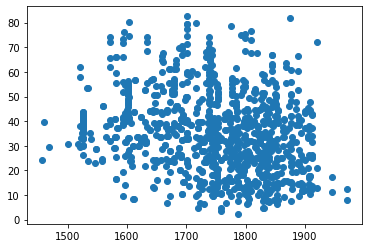

In [27]:
plt.scatter(x="agg", y="strength", data=df);

The negative correlation between aggregates and strength is intensified. But not adequately to draw independent conclusions. It is known that as aggregates increase, water requirement increases, hence water-cement ratio increases and strength reduces. This appears to be corroborated.

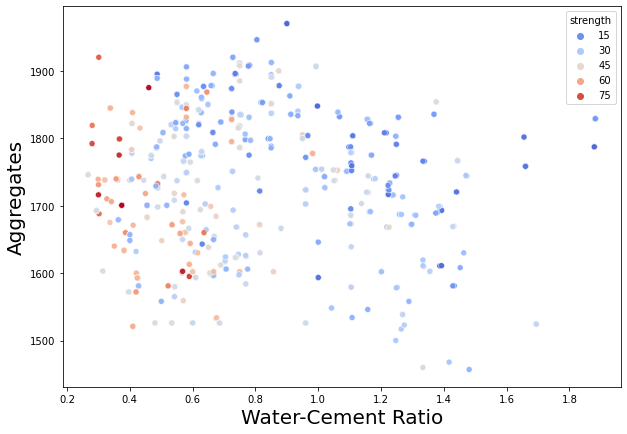

In [33]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="agg", x="wcratio", hue="strength", data=df, ax=ax, palette='coolwarm')
ax.set_ylabel('Aggregates', fontsize = 20.0) 
ax.set_xlabel('Water-Cement Ratio', fontsize = 20)
plt.show()

Let us create a variable combining cement and aggregates to determine if that makes results clearer.

In [26]:
df['wcaggratio'] = df.water / (df.cement  + df.coarseagg + df.fineagg)  # water (w) to cement(c) + aggregates(agg) ratio. 

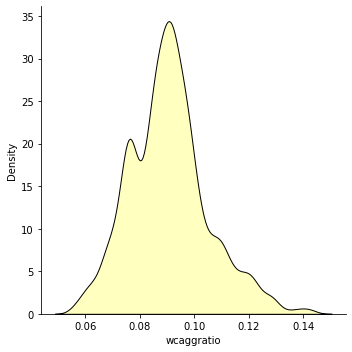

In [29]:
sns.displot(df["wcaggratio"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');

In [30]:
# Highlighting correlation between 'strength' and other columns
correlation_strength=df.corr()['strength']
correlation_strength.sort_values(ascending=False)

strength        1.000000
cement          0.488283
superplastic    0.344209
age             0.337367
slag            0.103374
ash            -0.080648
coarseagg      -0.144717
fineagg        -0.186448
agg            -0.256342
wcaggratio     -0.264166
water          -0.269624
wcratio        -0.489401
Name: strength, dtype: float64

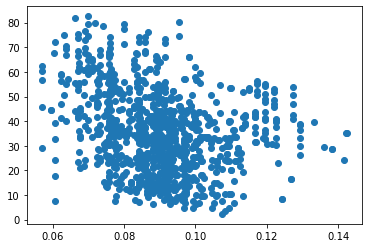

In [31]:
plt.scatter(x="wcaggratio", y="strength", data=df);

The plot is similar to the water-cement ratio vs strength plot and no additional information can be gleaned out. Hence, nothing has been gained by this set of engineered variables.

### Ash and Slag (Binders)

Binders are cementitious materials. Both ash and slag function as binders when added to a water-cement mix for concrete preparation. Both ash and slag are negatively correlated with cement but the pairplot did not reveal any obvious pattern. No clear pattern could be discerned even when comparing ash and slag directly with concrete strength.

Both ash and slag contribute to concrete strength when they are added as a proportion of cement (as a replacement).  Hence the relation between ash-cement ratio, slag-cement ratio and concrete strength merits study. As ash and slag work together as binders in cement, the ratio water - (cement,ash,slag) vs strength is also worth considering.

In [263]:
df['ash_c_ratio'] = df.ash / df.cement 
df['slag_c_ratio'] = df.slag / df.cement
df['w_binders_ratio'] = df.water / (df.cement  + df.slag + df.ash)  # binders are cement,slag and ash.

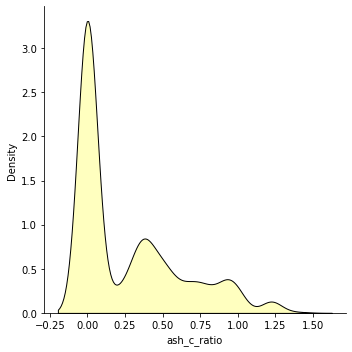

In [20]:
sns.displot(df["ash_c_ratio"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');

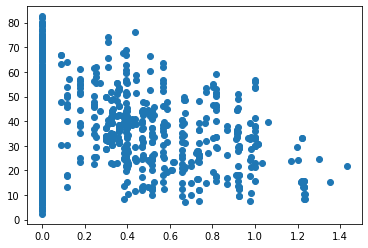

In [17]:
plt.scatter(x="ash_c_ratio", y="strength", data=df);

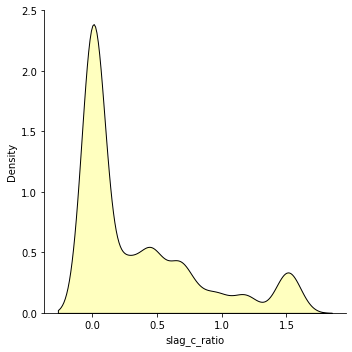

In [21]:
sns.displot(df["slag_c_ratio"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');

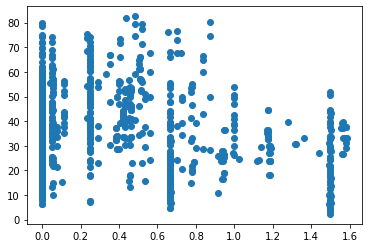

In [18]:
plt.scatter(x="slag_c_ratio", y="strength", data=df);

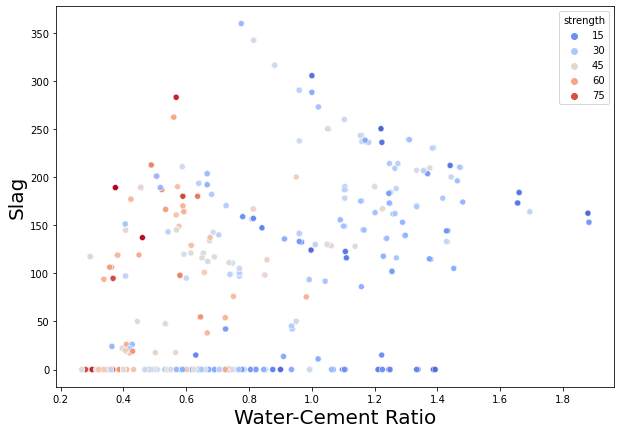

In [37]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="slag", x="wcratio", hue="strength", data=df, ax=ax, palette='coolwarm')
ax.set_ylabel('Slag', fontsize = 20.0) 
ax.set_xlabel('Water-Cement Ratio', fontsize = 20)
plt.show()

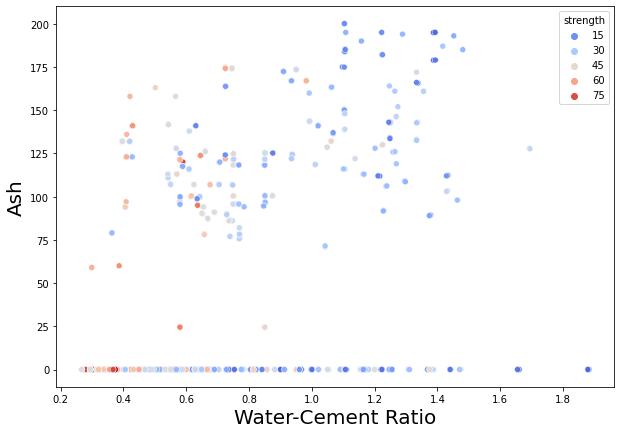

In [38]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="ash", x="wcratio", hue="strength", data=df, ax=ax, palette='coolwarm')
ax.set_ylabel('Ash', fontsize = 20.0) 
ax.set_xlabel('Water-Cement Ratio', fontsize = 20)
plt.show()

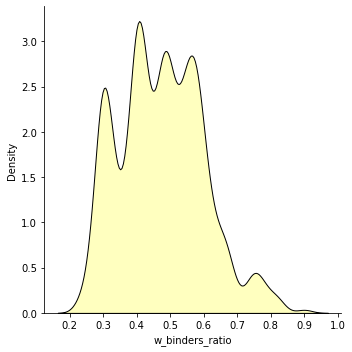

In [22]:
sns.displot(df["w_binders_ratio"],  kind="kde", bw_adjust=.75, fill=True, color='yellow', edgecolor='black');

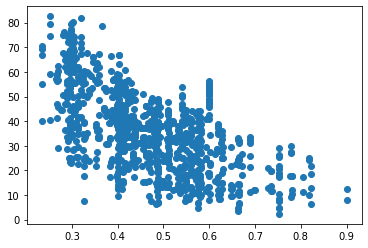

In [19]:
plt.scatter(x="w_binders_ratio", y="strength", data=df);

In [32]:
# Highlighting correlation between 'strength' and other columns
correlation_strength=df.corr()['strength']
correlation_strength.sort_values(ascending=False)

strength           1.000000
cement             0.488283
superplastic       0.344209
age                0.337367
slag               0.103374
slag_c_ratio      -0.079221
ash               -0.080648
coarseagg         -0.144717
ash_c_ratio       -0.163659
fineagg           -0.186448
agg               -0.256342
wcaggratio        -0.264166
water             -0.269624
wcratio           -0.489401
w_binders_ratio   -0.610843
Name: strength, dtype: float64

It can be concluded that:-

Ash is negatively correlated with cement. In the ash-cement ratio vs srength plot, this negative correlation was more pronounced.
    
Nothing significant could be derived from the slag-cement ratio vs cement plot. The ash / slag versus water-cement ratio and strength plot did not reveal any insights.

However, the water - binders versus strength plot revealed a very significant negative correlation and hence this engineered variable is worthy of retention along with ash and slag as separate variables.



## Superplasticizer

Superplasticizer acts as a water reducer. It is positively correlated with strength. The inverse relation between water and superplasticizer is already established. The effect of superplasticizer on strength with ageing concrete could also be studied.

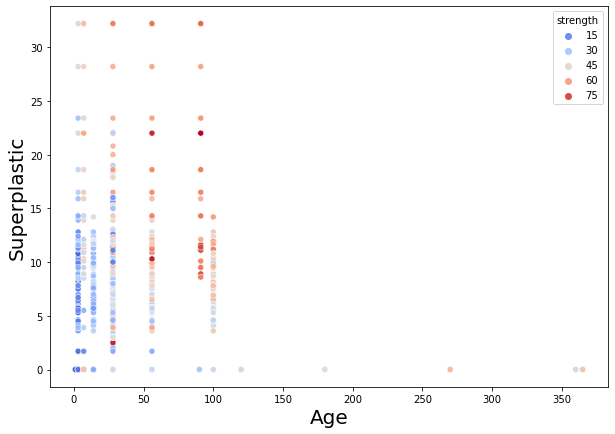

In [41]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="superplastic", x="age", hue="strength", data=df, ax=ax, palette='coolwarm')
ax.set_ylabel('Superplastic', fontsize = 20.0) 
ax.set_xlabel('Age', fontsize = 20)
plt.show()

Clearly, as the concrete ages, the effect of superplasticizer is to increase concrete strength. Data is not available beyond 100 days of concrete age to draw any other conclusions. It is possible that concrete strength was observed to plateau beyond a certain concrete age and testing was not done.  For any age of the concrete mix, strength improved as superplasticizer was added.

## Analysis

Analysis till now clearly indicates that:-

All the features in the primary database are relevant and contribute to concrete strength.

Of the engineered features, only water-cement ratio and water-binders, i.e. water - (cement,ash,slag) are worth retaining.  The other engineered variables may not contribute to model efficiency.

If water-cement ratio is retained, there is a case to drop water and cement as individual features.

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions:    

Linear relationship   
Multivariate normality    
No or little multicollinearity    
No auto-correlation    
Homoscedasticity    

The analysis till this point has revealed that linear regression is not suitable for this dataset.

## Feature Importance

In [60]:
X = df.drop('strength',axis=1) # x axis without the target variable     
y = df['strength']   # target variable on y axis
def cor_selector(X, y,num_feats):  # For numerical features
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-11:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y, 11)
print(str(len(cor_feature)), 'selected features')
cor_feature

11 selected features


['coarseagg',
 'ash_c_ratio',
 'fineagg',
 'agg',
 'wcaggratio',
 'water',
 'age',
 'superplastic',
 'cement',
 'wcratio',
 'w_binders_ratio']

In [61]:
rfe_selector = RFE(estimator=XGBRegressor(), n_features_to_select=11, step=10, verbose=0)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

[04:21:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
11 selected features


['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'age',
 'wcratio',
 'agg',
 'ash_c_ratio',
 'slag_c_ratio',
 'w_binders_ratio']

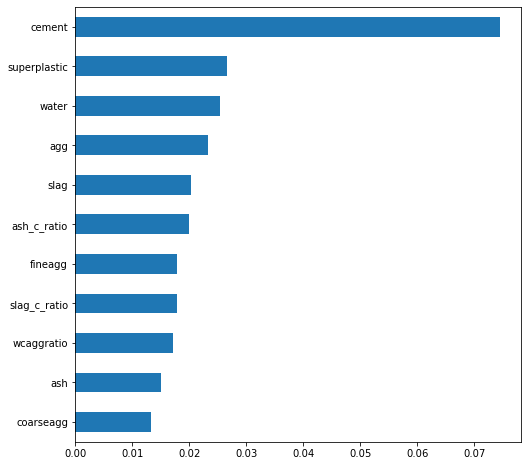

In [62]:
X = df.drop('strength',axis=1) # x axis without the target variable     
y = df['strength']   # target variable on y axis
XT = ExtraTreesRegressor()  # Identifying features with low importance
XT.fit(X,y)
feat_importances = pd.Series(XT.feature_importances_, index=X.columns)
plt.rcParams['figure.figsize'] = (8,8)
feat_importances.nsmallest(11).plot(kind='barh')
plt.show;

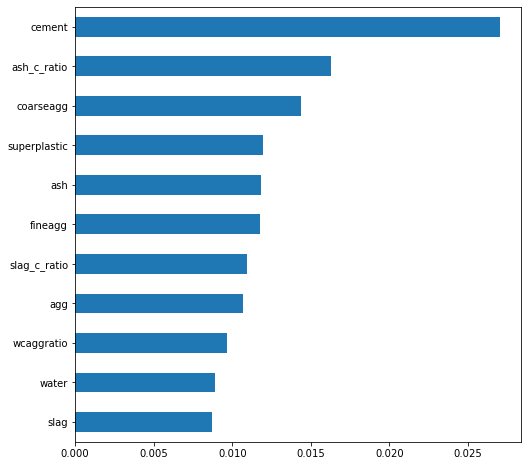

<Figure size 576x576 with 0 Axes>

In [64]:
RF = RandomForestRegressor()
RF.fit(X,y)
feat_importances = pd.Series(RF.feature_importances_, index=X.columns)
plt.rcParams['figure.figsize'] = (8,8)
feat_importances.nsmallest(11).plot(kind='barh')
plt.figure(figsize=(8,8))
plt.show;

Feature: 0, Score: 221.15404
Feature: 1, Score: 111.63025
Feature: 2, Score: 57.33932
Feature: 3, Score: 2.30932
Feature: 4, Score: -0.05621
Feature: 5, Score: 32.37997
Feature: 6, Score: 24.26272
Feature: 7, Score: 103.08565
Feature: 8, Score: -0.00769
Feature: 9, Score: 37.74107
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.01043
Feature: 13, Score: -0.00326


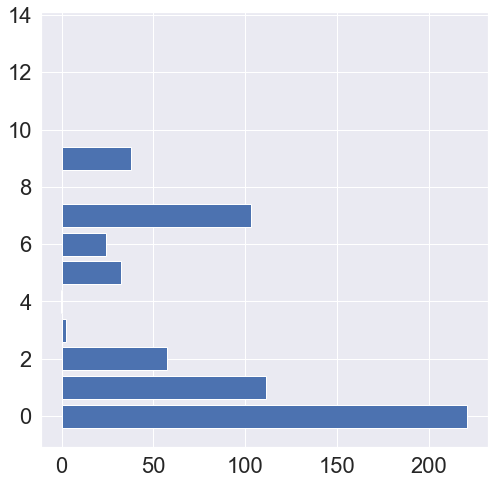

In [84]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
model = KNeighborsRegressor()
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()

In [65]:
from sklearn.feature_selection import SelectFromModel

embeded_RF_selector = SelectFromModel(RF, max_features=11)
embeded_RF_selector.fit(X, y)
embeded_RF_support = embeded_RF_selector.get_support()
embeded_RF_feature = X.loc[:,embeded_RF_support].columns.tolist()

embeded_XT_selector = SelectFromModel(XT, max_features=11)
embeded_XT_selector.fit(X, y)
embeded_XT_support = embeded_XT_selector.get_support()
embeded_XT_feature = X.loc[:,embeded_XT_support].columns.tolist()

In [75]:
# Putting all selections together
feature_selection_df = pd.DataFrame({'Feature':X.columns, 'Pearson':cor_support, 'RFE':rfe_support, 
                                    'Random Forest':embeded_RF_support, 'Extra Trees':embeded_XT_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(14)

,Feature,Pearson,RFE,Random Forest,Extra Trees,Total
1,wcratio,True,True,True,True,4
2,w_binders_ratio,True,True,True,True,4
3,age,True,True,True,True,4
4,cement,True,True,False,True,3
5,water,True,True,False,False,2
6,superplastic,True,True,False,False,2
7,ash_c_ratio,True,True,False,False,2
8,agg,True,True,False,False,2
9,wcaggratio,True,False,False,False,1
10,slag_c_ratio,False,True,False,False,1


In [71]:
import shap
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    
shap.initjs()


Root mean squared test error = 6.821904722176691


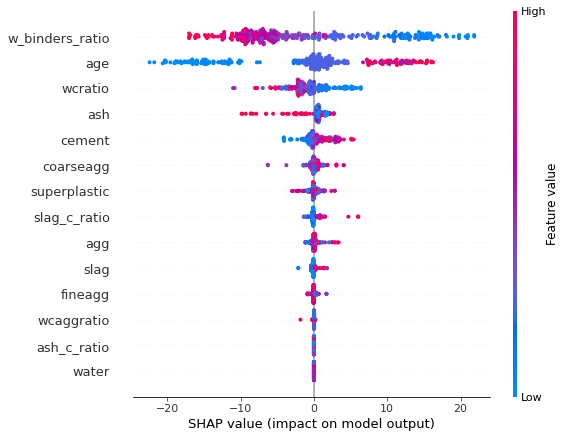

In [72]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Root mean squared test error = 4.751172913838941


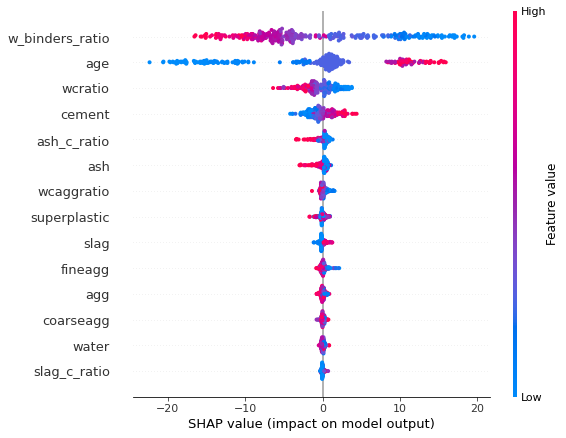

In [73]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## Dataframe for Model Building

In [264]:
# Create the final DataFrame for model development based on observations from the previous sections.
# Water-Cement ratio and Water-Binders ratio added.
new_columns = ['water','cement','wcratio','age', 'coarseagg','fineagg','slag', 'ash', 'w_binders_ratio','superplastic','strength']
df_new = df[new_columns]
df_new.head(10)

,water,cement,wcratio,age,coarseagg,fineagg,slag,ash,w_binders_ratio,superplastic,strength
0,203.5,141.3,1.440198,28,971.8,748.5,212.0,0.0,0.575998,0.0,29.89
1,158.3,168.9,0.937241,14,1080.8,796.2,42.2,124.3,0.471974,10.8,23.51
2,187.4,250.0,0.749600,28,956.9,861.2,0.0,95.7,0.542089,5.5,29.22
3,228.0,266.0,0.857143,28,932.0,670.0,114.0,0.0,0.600000,0.0,45.85
4,193.3,154.8,1.248708,28,1047.4,696.7,183.4,0.0,0.571555,9.1,18.29
5,192.0,255.0,0.752941,90,889.8,945.0,0.0,0.0,0.752941,0.0,21.86
6,203.5,166.8,1.220024,7,975.6,692.6,250.2,0.0,0.488010,0.0,15.75
7,188.5,251.4,0.749801,56,1028.4,757.7,0.0,118.3,0.509873,6.4,36.64
8,192.0,296.0,0.648649,28,1085.0,765.0,0.0,0.0,0.648649,0.0,21.65
9,194.0,155.0,1.251613,28,880.0,699.0,184.0,143.0,0.402490,9.0,28.99


In [206]:
df_new.shape

(1005, 11)

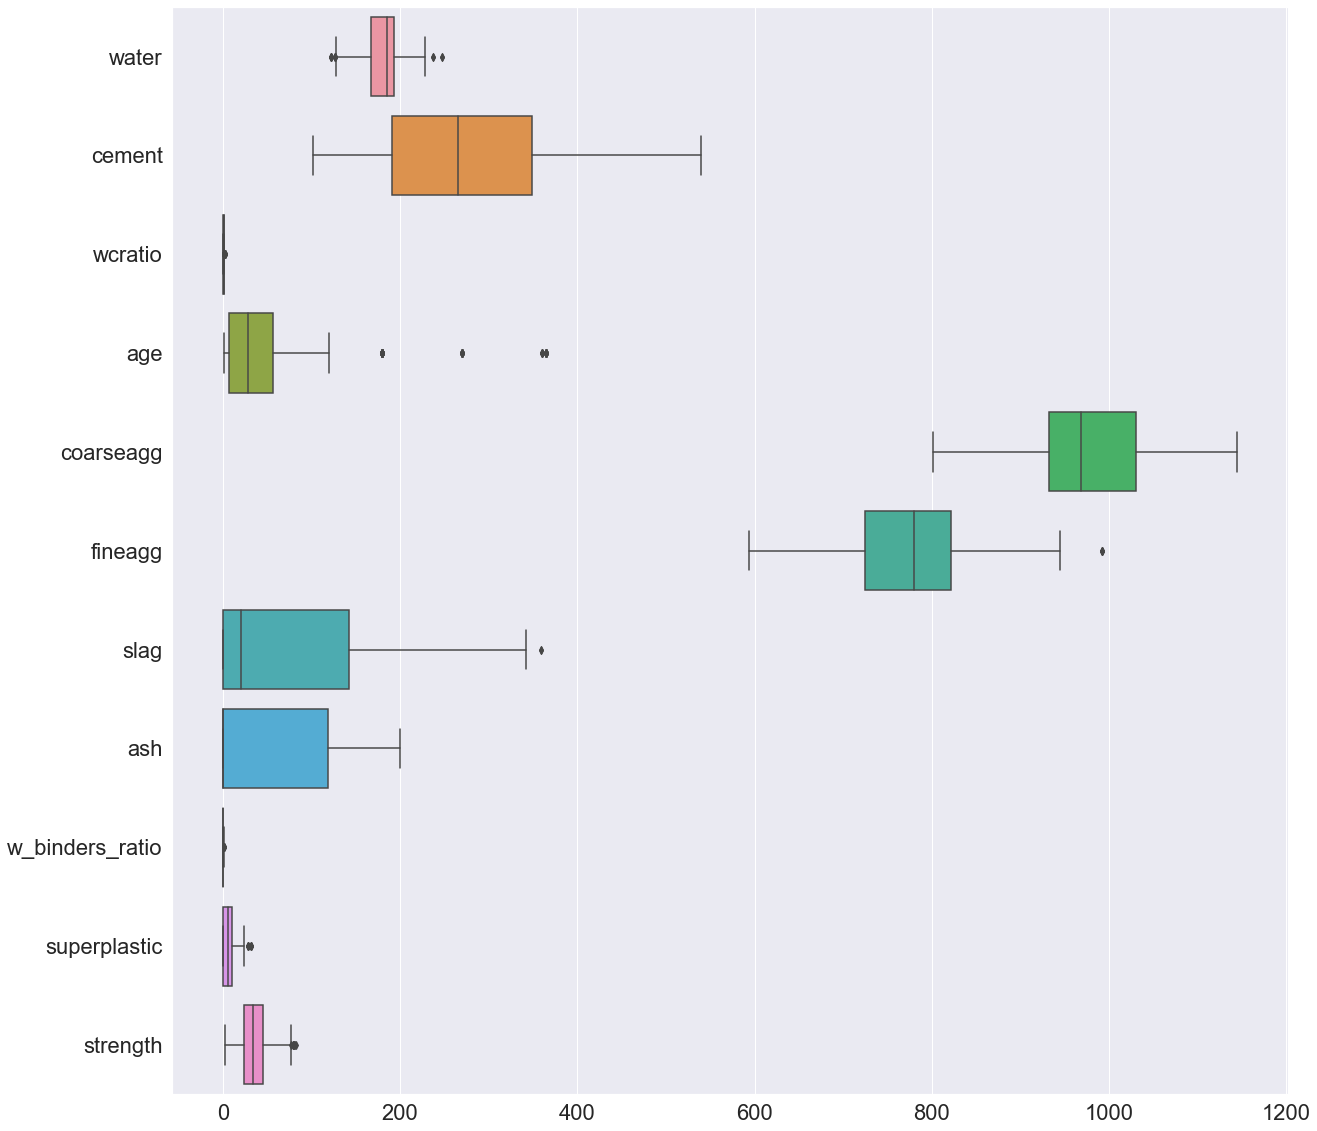

In [207]:
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
sns.set(palette='coolwarm')
sns.set(font_scale=2)
plt.figure(figsize=(20,20))
sns.boxplot(data = df_new,orient="h")
plt.show()

In this dataset, the observations have been recorded by direct testing / observation. Therefore, dealing with outliers in the standard manner may introduce errors in legitimate data. This dilemma will have to be considered carefully.

In [154]:
skew = df_new.skew()
kurt = df_new.kurt()
pd.concat([skew.rename('skewness'), kurt.rename('kurtosis')],axis=1)

,skewness,kurtosis
water,0.034433,0.167329
cement,0.564959,-0.432458
wcratio,0.940469,0.717513
age,3.253974,11.961963
coarseagg,-0.065256,-0.583049
fineagg,-0.252353,-0.105881
slag,0.855225,-0.407179
ash,0.497231,-1.366694
w_binders_ratio,0.391916,-0.171486
superplastic,0.980604,1.695396


In [155]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
water,1005.0,182.075323,21.339334,121.800000,166.600000,185.700000,192.900000,247.000000
cement,1005.0,278.631343,104.344261,102.000000,190.700000,265.000000,349.000000,540.000000
wcratio,1005.0,0.756220,0.313524,0.266893,0.547465,0.689531,0.937241,1.882353
age,1005.0,45.856716,63.734692,1.000000,7.000000,28.000000,56.000000,365.000000
coarseagg,1005.0,974.376816,77.579667,801.000000,932.000000,968.000000,1031.000000,1145.000000
fineagg,1005.0,772.688259,80.340435,594.000000,724.300000,780.000000,822.200000,992.600000
slag,1005.0,72.043483,86.170807,0.000000,0.000000,20.000000,142.500000,359.400000
ash,1005.0,55.536318,64.207969,0.000000,0.000000,0.000000,118.300000,200.100000
w_binders_ratio,1005.0,0.473136,0.125497,0.235073,0.389522,0.480000,0.561298,0.900000
superplastic,1005.0,6.033234,5.919967,0.000000,0.000000,6.100000,10.000000,32.200000


In [265]:
Q1 = df_new['water'].quantile(0.25)
Q3 = df_new['water'].quantile(0.75)
IQR = Q3-Q1
Low = Q1-1.7*IQR
High = Q3+1.7*IQR
print('Number of lower outliers is', df_new[df_new['water']<Low]['water'].count())
print('Number of upper outliers is', df_new[df_new['water']>High]['water'].count())

Number of lower outliers is 5
Number of upper outliers is 2


In [266]:
df_new["water"] = np.where(df_new["water"] >(df_new['water'].quantile(0.99)), (df_new['water'].quantile(0.99)),df_new['water'])
df_new["water"] = np.where(df_new["water"] <(df_new['water'].quantile(0.01)), (df_new['water'].quantile(0.01)),df_new['water'])

In [267]:
Q1 = df_new['wcratio'].quantile(0.25)
Q3 = df_new['wcratio'].quantile(0.75)
IQR = Q3-Q1
Low = Q1-1.7*IQR
High = Q3+1.7*IQR
print('Number of upper outliers is', df_new[df_new['wcratio']>High]['wcratio'].count())
print('Number of lower outliers is', df_new[df_new['wcratio']<Low]['wcratio'].count())

Number of upper outliers is 18
Number of lower outliers is 0


In [268]:
df_new["wcratio"] = np.where(df_new["wcratio"] >(df_new['wcratio'].quantile(0.99)), (df_new['wcratio'].quantile(0.99)),df_new['wcratio'])

The outliers in 'age' column must be accepted without any modifications. They are deliberate. It is expected that concrete sets by 28 to 30 days mostly. The process is nearly finished by 90 days. However, the 365/366 day evaluations are also important. Hence, this data is not being modified.

In [269]:
Q1 = df_new['fineagg'].quantile(0.25)
Q3 = df_new['fineagg'].quantile(0.75)
IQR = Q3-Q1
Low = Q1-1.7*IQR
High = Q3+1.7*IQR
print('Number of upper outliers is', df_new[df_new['fineagg']>High]['fineagg'].count())
print('Number of lower outliers is', df_new[df_new['fineagg']<Low]['fineagg'].count())

Number of upper outliers is 5
Number of lower outliers is 0


In [270]:
df_new["fineagg"] = np.where(df_new["fineagg"] >(df_new['fineagg'].quantile(0.99)), (df_new['fineagg'].quantile(0.99)),df_new['fineagg'])

In [271]:
Q1 = df_new['slag'].quantile(0.25) # Two outliers between 1.5 IQR and 1.7 IQR - No action
Q3 = df_new['slag'].quantile(0.75)
IQR = Q3-Q1
Low = Q1-1.7*IQR
High = Q3+1.7*IQR
print('Number of upper outliers is', df_new[df_new['slag']>High]['slag'].count())
print('Number of lower outliers is', df_new[df_new['slag']<Low]['slag'].count())

Number of upper outliers is 0
Number of lower outliers is 0


In [272]:
Q1 = df_new['w_binders_ratio'].quantile(0.25) 
Q3 = df_new['w_binders_ratio'].quantile(0.75)
IQR = Q3-Q1
Low = Q1-1.7*IQR
High = Q3+1.7*IQR
print('Number of upper outliers is', df_new[df_new['w_binders_ratio']>High]['w_binders_ratio'].count())
print('Number of lower outliers is', df_new[df_new['w_binders_ratio']<Low]['w_binders_ratio'].count())

Number of upper outliers is 2
Number of lower outliers is 0


In [273]:
df_new["w_binders_ratio"] = np.where(df_new["w_binders_ratio"] >(df_new['w_binders_ratio'].quantile(0.99)), (df_new['w_binders_ratio'].quantile(0.99)),df_new['w_binders_ratio'])

In [274]:
Q1 = df_new['superplastic'].quantile(0.25)
Q3 = df_new['superplastic'].quantile(0.75)
IQR = Q3-Q1
Low = Q1-1.7*IQR
High = Q3+1.7*IQR
print('Number of upper outliers is', df_new[df_new['superplastic']>High]['superplastic'].count())
print('Number of lower outliers is', df_new[df_new['superplastic']<Low]['superplastic'].count())

Number of upper outliers is 10
Number of lower outliers is 0


In [275]:
df_new["superplastic"] = np.where(df_new["superplastic"] >(df_new['superplastic'].quantile(0.99)), (df_new['superplastic'].quantile(0.99)),df_new['superplastic'])

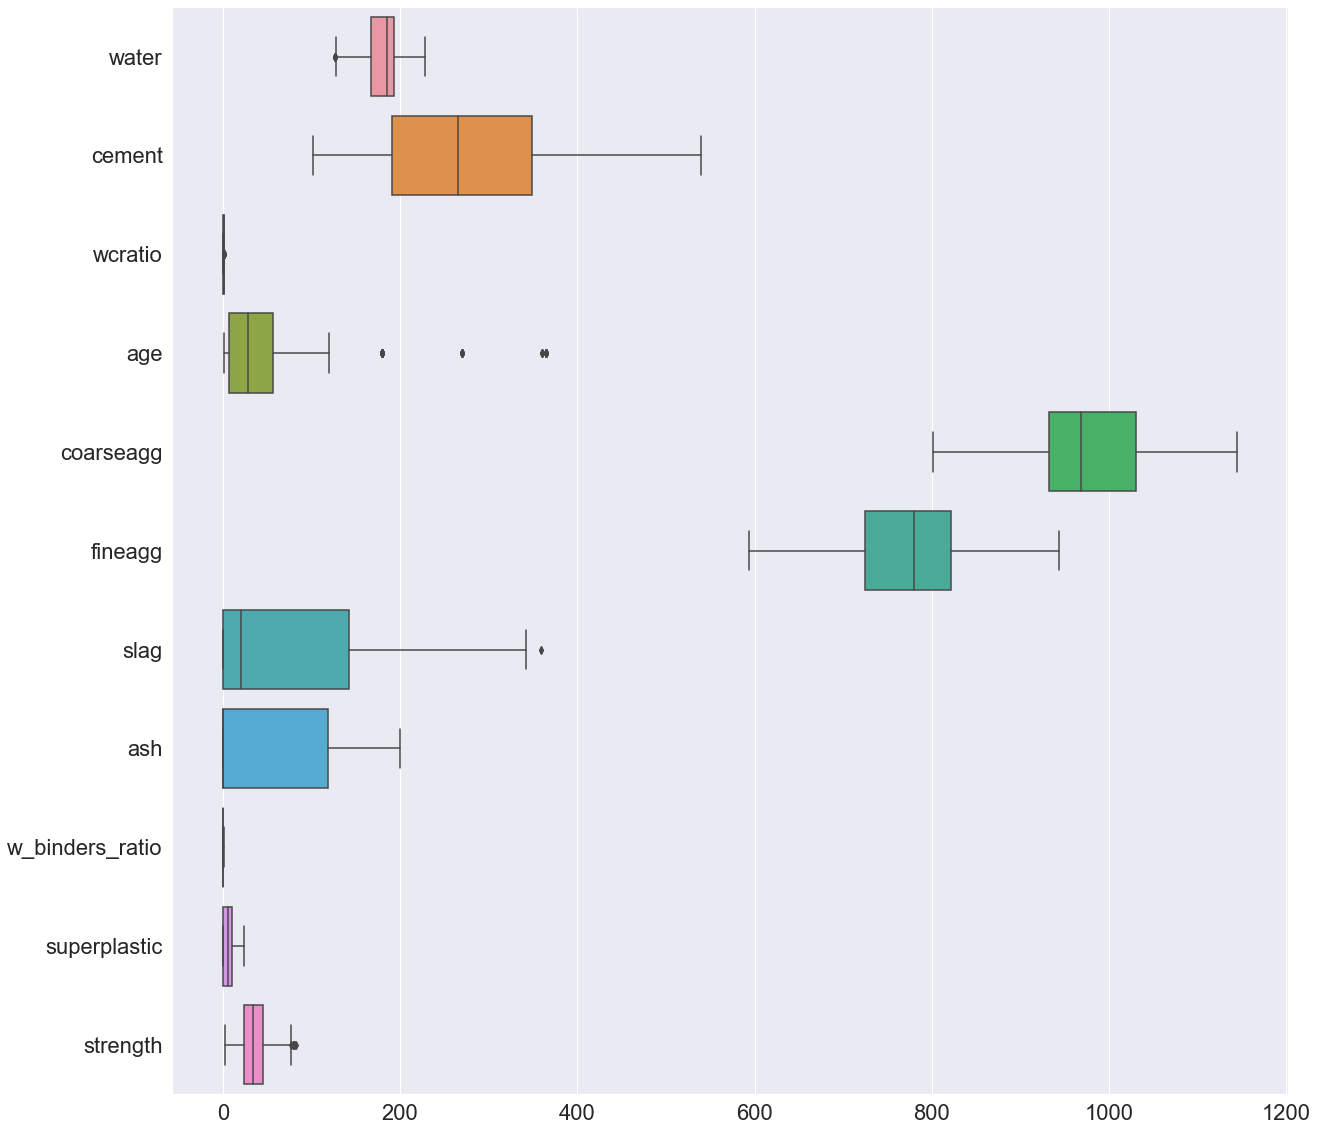

In [276]:
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
sns.set(palette='coolwarm')
sns.set(font_scale=2)
plt.figure(figsize=(20,20))
sns.boxplot(data = df_new,orient="h")
plt.show()

In [220]:
skew = df_new.skew()
kurt = df_new.kurt()
pd.concat([skew.rename('skewness'), kurt.rename('kurtosis')],axis=1)

,skewness,kurtosis
water,0.017349,0.012225
cement,0.564959,-0.432458
wcratio,0.820398,0.175311
age,3.253974,11.961963
coarseagg,-0.065256,-0.583049
fineagg,-0.306014,-0.208091
slag,0.855225,-0.407179
ash,0.497231,-1.366694
w_binders_ratio,0.343842,-0.338755
superplastic,0.648962,0.043298


There is an improvement in skewness in a few variables.

## Model Development

In [277]:
X = df_new.drop('strength',axis=1) # x axis without the target variable     
y = df_new['strength']   # target variable on y axis

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [279]:
print("{0:0.2f}% Data in training set".format((len(X_train)/len(df.index)) * 100)) # Check the data split.
print("{0:0.2f}% Data in test set".format((len(X_test)/len(df.index)) * 100))

69.95% Data in training set
30.05% Data in test set


In [280]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

In [281]:
X_test_sc = scaler.transform(X_test)

We are aware that a linear regression model is not suited for this dataset. Let us try Linear Regression, Lasso and Ridge using Python code again for standard model comparisons. 

In [252]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [254]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))

print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.19 		 103.86 	7.92 		0.55
LassoRegression 	 10.27 		 105.53 	8.01 		0.55
RidgeRegression 	 10.23 		 104.61 	7.95 		0.55


The performance in the three models is similar.

Let us now try a Polynomial model. 

In [255]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [256]:
X_poly = poly.fit(X_train_sc)
X_poly, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
lr.fit(X_poly,y_train)
print(lr.score(X_poly, y_train))
print(lr.score(X_test_sc, y_test))

0.6298753646036106
-25.750256220603116


Therefore, a polynomial model would not help us for this dataset.

Let us now try the Random Forest and Extra Trees Regressor

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.68 		 21.91 		3.44 		0.91


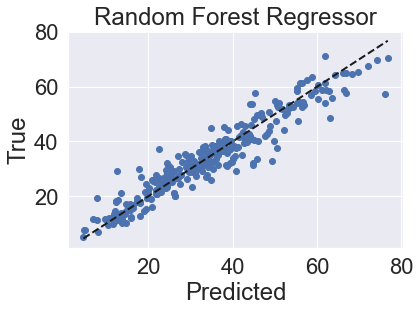

In [286]:
rfr = RandomForestRegressor(n_estimators=100, random_state=1)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

Model				 RMSE 		 MSE 		 MAE 		 R2
Extra Trees Regressor 	 4.67 		 21.78 		3.28 		0.91


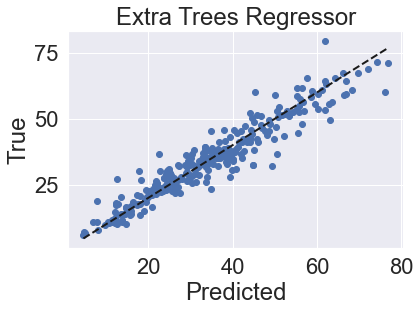

In [287]:
xtr = ExtraTreesRegressor(n_estimators=100,random_state=1)

xtr.fit(X_train, y_train)

y_pred_xtr = xtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Extra Trees Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_xtr)),mean_squared_error(y_test, y_pred_xtr),
            mean_absolute_error(y_test, y_pred_xtr), r2_score(y_test, y_pred_xtr)))

plt.scatter(y_test, y_pred_xtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Extra Trees Regressor")
plt.show()

Extra Trees is marginally better than Random Forest Regressor

In [288]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [291]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [293]:
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=1, n_jobs = -1)
rfr_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1)

In [294]:
rfr_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.70 		 22.12 		3.44 		0.90


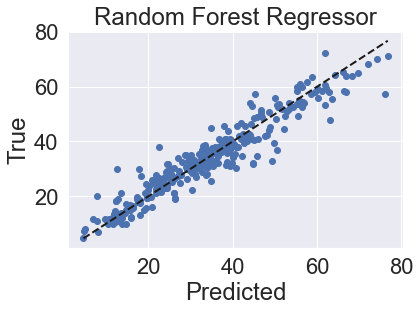

In [295]:
rfr = RandomForestRegressor(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 110, bootstrap = True, random_state=1)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [298]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000, 1600, 1800]
}

rfr = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.03 		 25.26 		3.71 		0.89


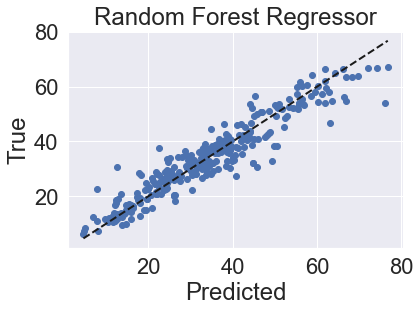

In [299]:
rfr = RandomForestRegressor(n_estimators = 200, min_samples_split = 8, min_samples_leaf = 3, max_features = 'auto', max_depth = 100, bootstrap = True, random_state=1)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

The Random Forest Regressor results before hyperparameter tuning were nearly the same as after hyperparameter tuning. We are not attempting to tune the Extra Forest Regressor further.

Let us now try ADA Boost and XGB Regressor.

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 6.86 		 47.11 		5.58 		0.80


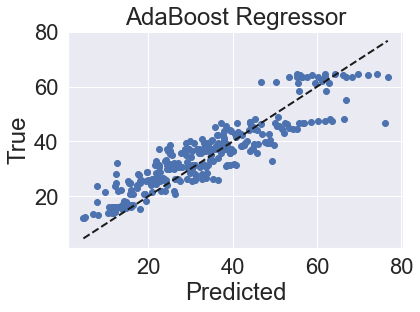

In [301]:
ada = AdaBoostRegressor(random_state=1)

ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ada)),mean_squared_error(y_test, y_pred_ada),
            mean_absolute_error(y_test, y_pred_ada), r2_score(y_test, y_pred_ada)))

plt.scatter(y_test, y_pred_ada)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoost Regressor")
plt.show()

[11:08:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.61 		 21.23 		3.49 		0.91


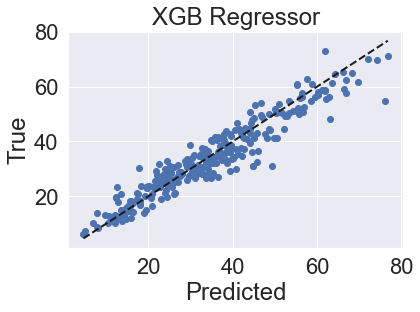

In [302]:
xgb = XGBRegressor(random_state=1)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_xgb)),mean_squared_error(y_test, y_pred_xgb),
            mean_absolute_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb)))

plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGB Regressor")
plt.show()

Tuning XGB Regressor

In [310]:
params = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = params, n_iter=100,cv=5, n_jobs=-1,random_state=1)
xgb_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(random_state=1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7],
                                        'learning_rate': [0.03, 0.05, 0.07],
                                        'max_depth': [5, 6, 7],
                                        'min_child_weight': [4],
                                        'n_estimators': [500], 'nthread': [4],
                                        'objective': ['reg:linear'],
                                        'silent': [1], 'subsample': [0.7]},
                   random_state=1)

In [311]:
xgb_random.best_params_

{'subsample': 0.7,
 'silent': 1,
 'objective': 'reg:linear',
 'nthread': 4,
 'n_estimators': 500,
 'min_child_weight': 4,
 'max_depth': 6,
 'learning_rate': 0.07,
 'colsample_bytree': 0.7}

Model				 RMSE 		 MSE 		 MAE 		 R2
XGB Regressor 	 3.87 		 15.01 		2.62 		0.94


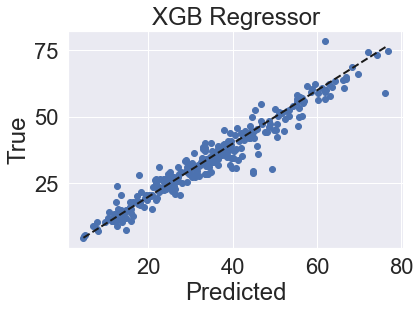

In [315]:
xgb = XGBRegressor(subsample = 0.7,
 silent = 1,
 objective = 'reg:linear',
 nthread = 4,
 n_estimators = 500,
 min_child_weight = 4,
 max_depth = 6,
 learning_rate = 0.07,
 colsample_bytree = 0.7,
 random_state=1)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""XGB Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_xgb)),mean_squared_error(y_test, y_pred_xgb),
            mean_absolute_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb)))

plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGB Regressor")
plt.show()

In [319]:
params = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}


xgb_grid = GridSearchCV(estimator = xgb, param_grid = params, cv=10, n_jobs=-1, verbose=0)
xgb_grid.fit(X_train,y_train)
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 3.94 		 15.50 		2.69 		0.93


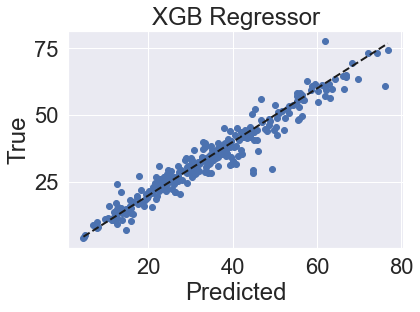

In [320]:
xgb = XGBRegressor(colsample_bytree = 0.7,
 learning_rate = 0.07,
 max_depth = 7,
 min_child_weight = 4,
 n_estimators = 500,
 nthread = 4,
 objective = 'reg:linear',
 silent = 1,
 subsample = 0.7,
 random_state=1)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_xgb)),mean_squared_error(y_test, y_pred_xgb),
            mean_absolute_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb)))

plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGB Regressor")
plt.show()

## To conclude, XGB Regressor with RMSE 3.87 and R Squared 0.94 is the best model for this dataset.